In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import shap
from sklearn.compose import ColumnTransformer

df = pd.read_csv("BMW_Car_Sales_Classification.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [26]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [27]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

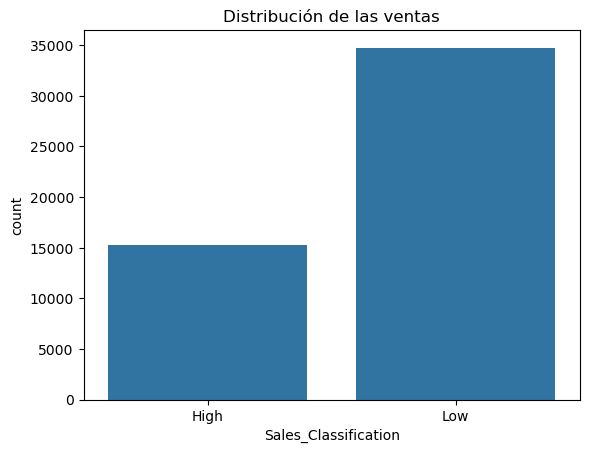

In [5]:
sns.countplot(x="Sales_Classification", data=df)
plt.title("Distribución de las ventas")
plt.show()

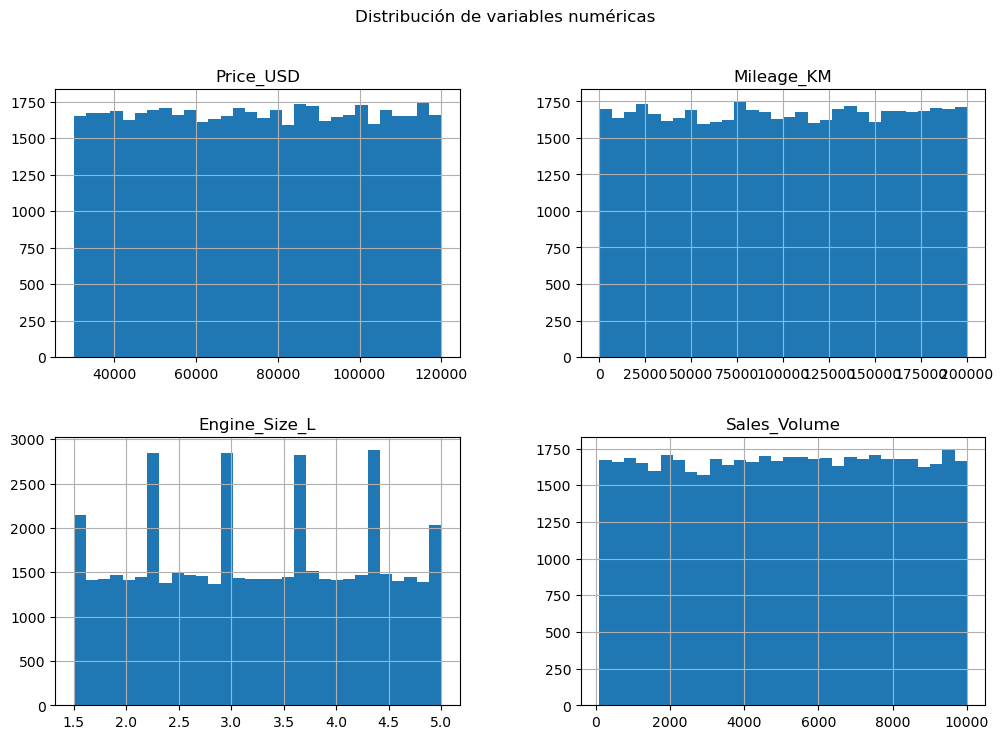

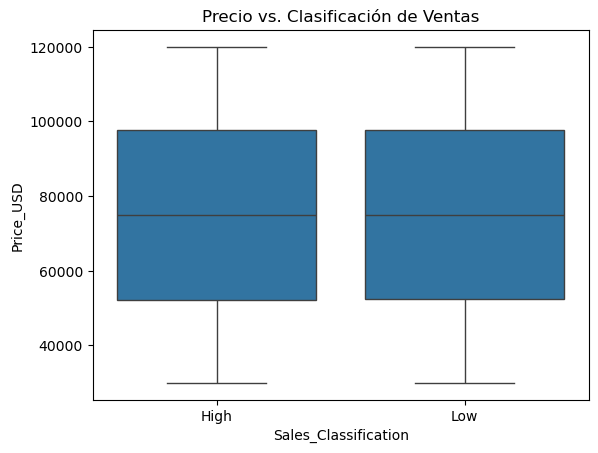

In [6]:
num_vars = ["Price_USD", "Mileage_KM", "Engine_Size_L", "Sales_Volume"]

df[num_vars].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribución de variables numéricas")
plt.show()

sns.boxplot(x="Sales_Classification", y="Price_USD", data=df)
plt.title("Precio vs. Clasificación de Ventas")
plt.show()

In [7]:
- Price_USD: Parece tener una distribución sesgada a la derecha, lo que sugiere que la mayoría de los vehículos están en el rango de precios más bajos, con unos pocos modelos más caros que elevan el extremo superior.
- Mileage_KM: Distribución bastante amplia, pero con una concentración en los primeros 100,000 km. Esto podría indicar que muchos autos son relativamente nuevos o poco usados.
- Engine_Size_L: Se nota una preferencia por motores entre 1.5 y 2.5 litros, lo cual es típico en coches compactos y sedanes. Los motores más grandes son menos frecuentes.
- Sales_Volume: La mayoría de los modelos tienen volúmenes de venta bajos, pero hay algunos que claramente dominan el mercado.
- No parece haber una diferencia significativa en el precio entre los autos con ventas altas y bajas. Eso podría indicar que el precio no es el único factor 
que influye en el volumen de ventas… ¿quizás el diseño, la marca, o el consumo de combustible también juegan un papel?


SyntaxError: illegal target for annotation (320939979.py, line 1)

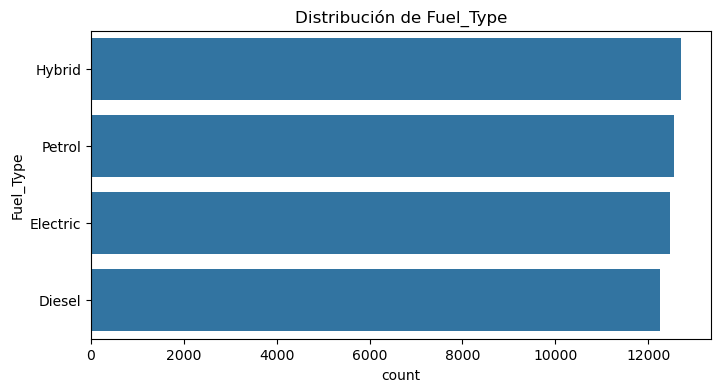

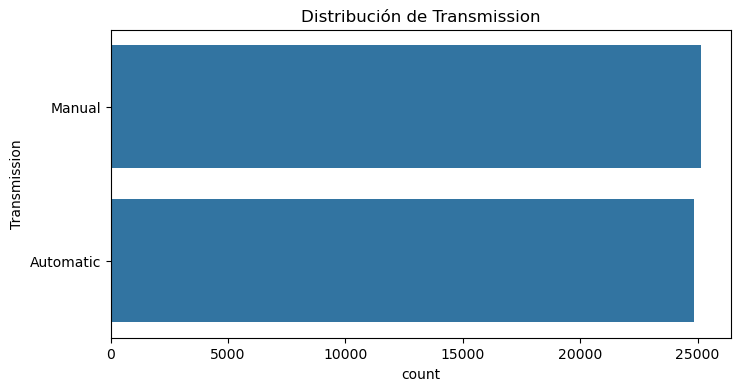

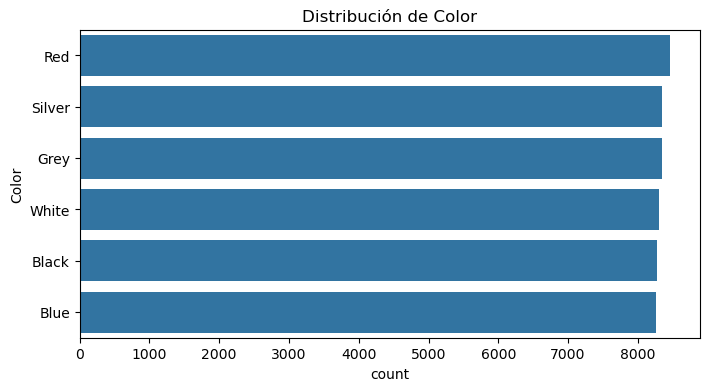

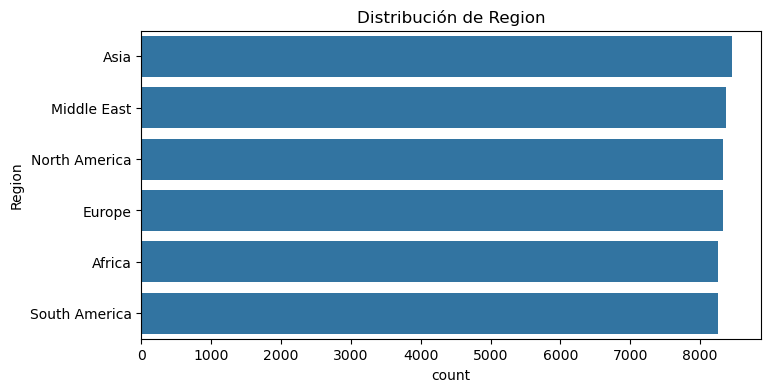

In [8]:
cat_vars = ["Fuel_Type", "Transmission", "Color", "Region"]

for col in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()

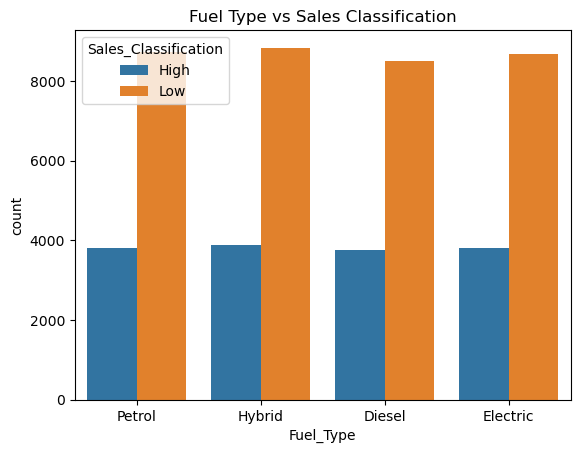

In [9]:
sns.countplot(x="Fuel_Type", hue="Sales_Classification", data=df)
plt.title("Fuel Type vs Sales Classification")
plt.show()

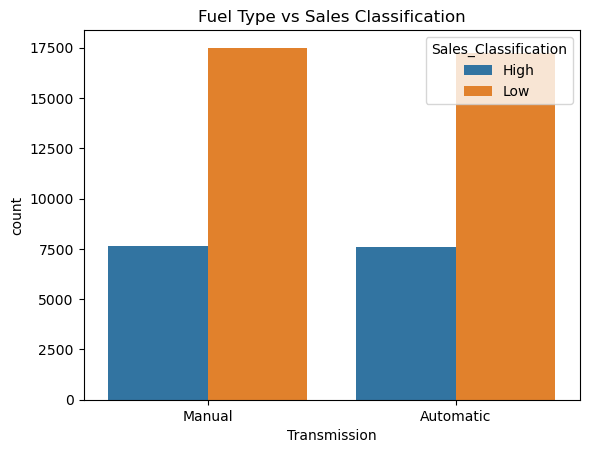

In [10]:
sns.countplot(x="Transmission", hue="Sales_Classification", data=df)
plt.title("Fuel Type vs Sales Classification")
plt.show()

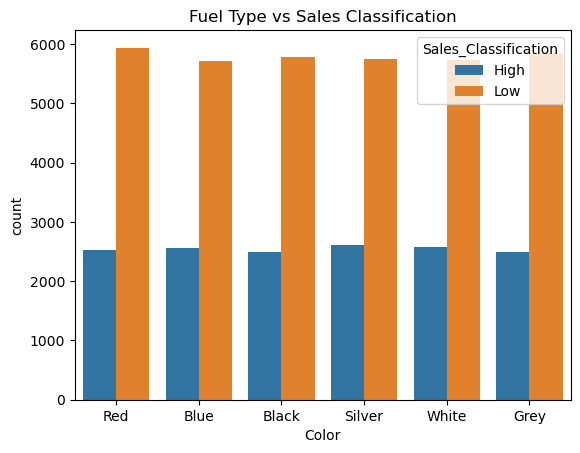

In [11]:
sns.countplot(x="Color", hue="Sales_Classification", data=df)
plt.title("Fuel Type vs Sales Classification")
plt.show()

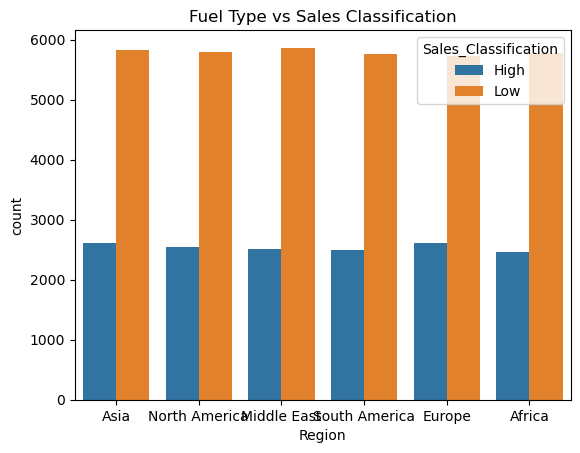

In [12]:
sns.countplot(x="Region", hue="Sales_Classification", data=df)
plt.title("Fuel Type vs Sales Classification")
plt.show()

In [28]:
# Convertir variables de tipo object a category
df['Model'] = df['Model'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Sales_Classification'] = df['Sales_Classification'].astype('category')

# Verificamos cambios
print(df.dtypes)

Model                   category
Year                       int64
Region                  category
Color                   category
Fuel_Type               category
Transmission            category
Engine_Size_L            float64
Mileage_KM                 int64
Price_USD                  int64
Sales_Volume               int64
Sales_Classification    category
dtype: object


In [29]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [22]:
print(df.dtypes.value_counts())

bool       25
int64       4
float64     1
int8        1
Name: count, dtype: int64


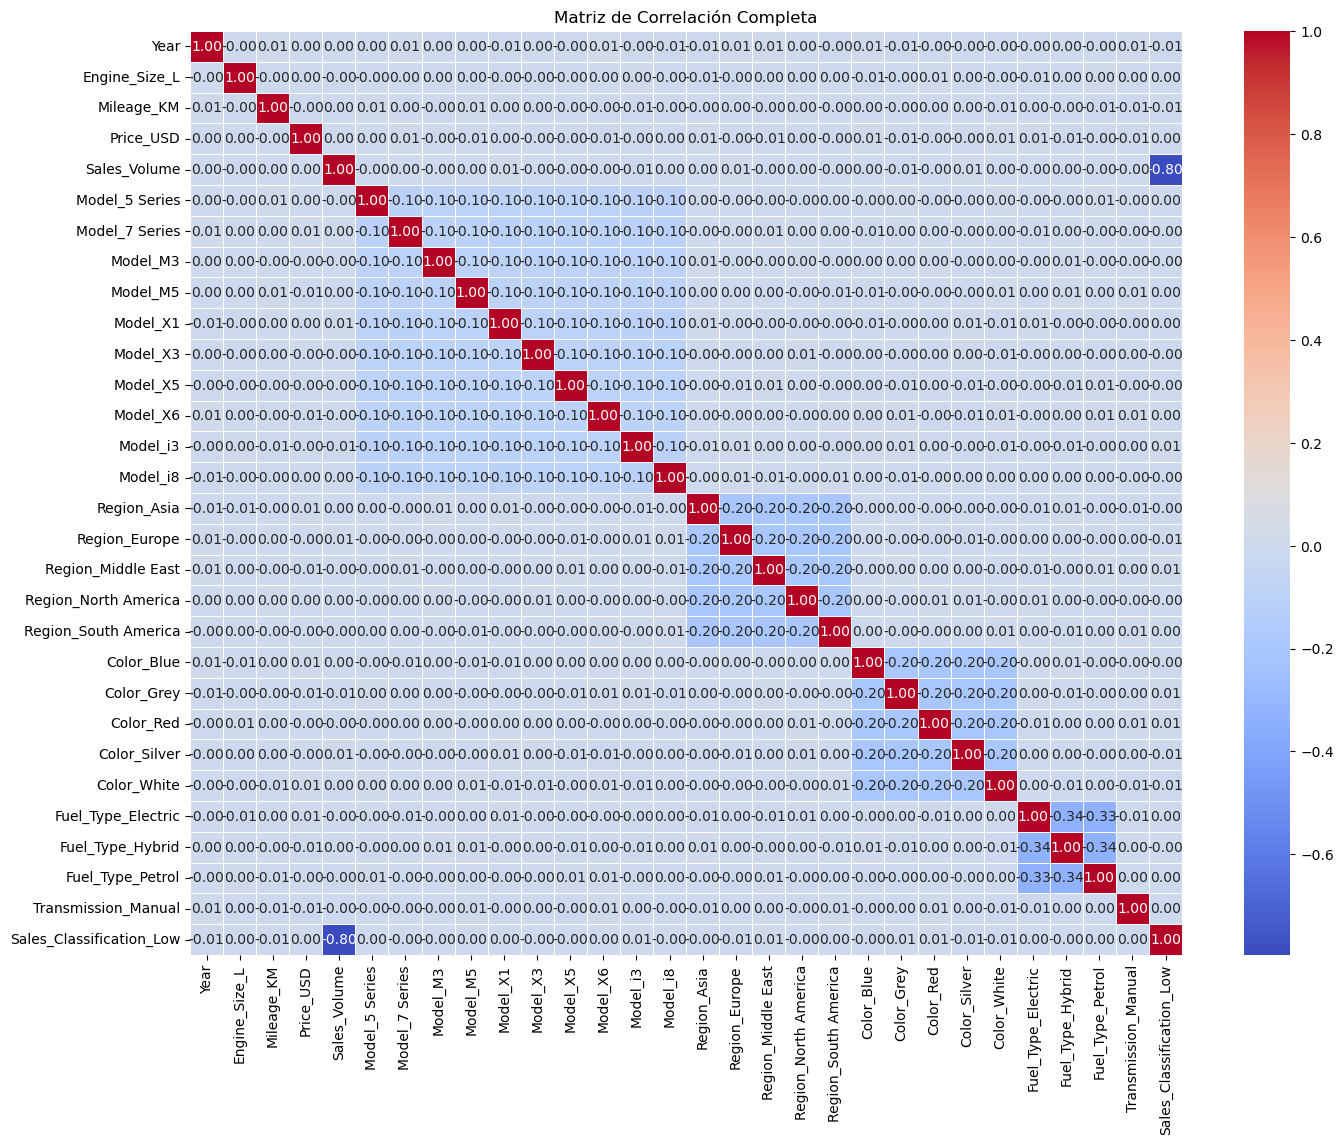

In [30]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))  # Ajusta el tamaño según tu número de variables
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Completa")
plt.show()

In [31]:
# Mostrar los nombres exactos de las columnas
print(df.columns.tolist())

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Model_5 Series', 'Model_7 Series', 'Model_M3', 'Model_M5', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X6', 'Model_i3', 'Model_i8', 'Region_Asia', 'Region_Europe', 'Region_Middle East', 'Region_North America', 'Region_South America', 'Color_Blue', 'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_White', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Sales_Classification_Low']


In [32]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('Sales_Classification_Low', axis=1)
y = df['Sales_Classification_Low']

In [33]:
# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Verificar las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000, 29) (15000, 29) (35000,) (15000,)


In [35]:
# Entrenar el modelo con RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
preds = rf_model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 4544     0]
 [    0 10456]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4544
        True       1.00      1.00      1.00     10456

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [37]:
print(X_train.dtypes)

Year                      int64
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Model_5 Series             bool
Model_7 Series             bool
Model_M3                   bool
Model_M5                   bool
Model_X1                   bool
Model_X3                   bool
Model_X5                   bool
Model_X6                   bool
Model_i3                   bool
Model_i8                   bool
Region_Asia                bool
Region_Europe              bool
Region_Middle East         bool
Region_North America       bool
Region_South America       bool
Color_Blue                 bool
Color_Grey                 bool
Color_Red                  bool
Color_Silver               bool
Color_White                bool
Fuel_Type_Electric         bool
Fuel_Type_Hybrid           bool
Fuel_Type_Petrol           bool
Transmission_Manual        bool
dtype: object


In [38]:
# Convertir columnas booleanas a enteros (0 y 1)
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

In [ ]:
#SHAP
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
print(shap_values[1].shape)
print(X_test.shape)

100%|===================| 29874/30000 [02:11<00:00]        

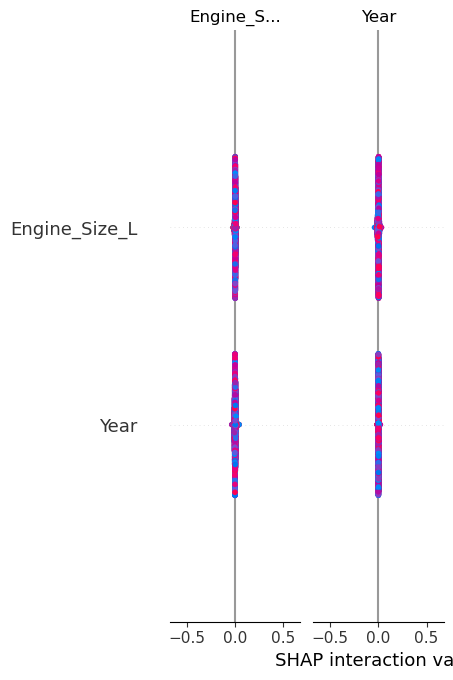

In [40]:
# desactivar esa verificación 
shap_values = explainer(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)